# Linear Regression

#### 🎯 Learning Goals

1. Understand how to solve the empirical risk minimization problem for regression tasks, when the hypothesis class contains only **Linear Models**.
2. Understand the **closed-form equation** for linear models.
3. Understand how to use **`scikit-learn`** to solve linear regression problems.

In [1]:
# Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dsf_helpers as dsfh

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

___
## Dataset
Before we dive into linear models, let us first load and discuss the dataset we will be working with.

In this notebook, we will work with a dataset of **bike rentals** in the city of Washington D.C. Each row in the dataset represents the number of bike rentals for a given hour of a given day. We will look at the following columns:
+ `cnt`: the total number of bike rentals (our target variable).
+ `temp`: the temperature outside (in Celsius, normalized on a scale between 0 and 1).
+ `hum`: the humidity level (normalized on a scale between 0 and 1).
+ `windspeed`: the wind speed (normalized on a scale between 0 and 1).

In [2]:
# Load the bike rental data
rentals = pd.read_csv("data/bike_rental.csv")

# Keep only some columns of interest
rentals = rentals[["cnt", "temp", "hum", "windspeed"]]
rentals.head()

,cnt,temp,hum,windspeed
0,16,0.24,0.81,0.0
1,40,0.22,0.80,0.0
2,32,0.22,0.80,0.0
3,13,0.24,0.75,0.0
4,1,0.24,0.75,0.0


Text(0.5, 0.98, 'Bike rentals vs weather')

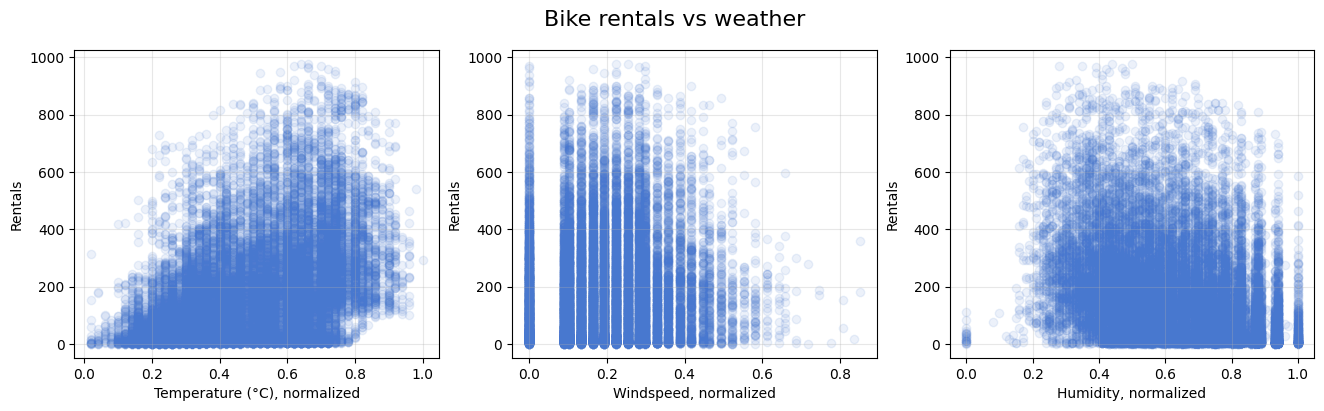

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# First plot, rentals vs temperature
axs[0].scatter(rentals["temp"], rentals["cnt"], alpha=0.1)
axs[0].set_xlabel("Temperature (°C), normalized")

# Second plot, rentals vs windspeed
axs[1].scatter(rentals["windspeed"], rentals["cnt"], alpha=0.1)
axs[1].set_xlabel("Windspeed, normalized")

# Third plot, rentals vs humidity
axs[2].scatter(rentals["hum"], rentals["cnt"], alpha=0.1)
axs[2].set_xlabel("Humidity, normalized")

# Common aesthetics for both plots
for ax in axs:
    ax.grid(alpha=0.3)
    ax.set_ylabel("Rentals")

# Add a title to the figure
fig.suptitle("Bike rentals vs weather", fontsize=16)

___
## Linear Models

Let us start by setting up a simple linear model. Suppose we believe that the number of bike rentals is a linear function of the temperature, the windspeed, and the humidity. Then we can write our hypothesis class as follows:

$$
\mathcal{H} = \left\{f_{\beta}(\mathbf{x}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 \mid \beta_0, \beta_1, \beta_2, \beta_3 \in \mathbb{R}\right\}
$$

where $\mathbf{x}^{(i)} \in \mathbb{R}^4$ is a vector containing the constant $1$, temperature, windspeed, and humidity for the $i$-th example, i.e., $\mathbf{x}^{(i)} = \begin{bmatrix}1 & \text{temp}^{(i)} & \text{windspeed}^{(i)} & \text{humidity}^{(i)}\end{bmatrix}$. In other words:

$$
f_{\beta}(\mathbf{x}) = \beta_0 \cdot 1+ \beta_1 \cdot \text{temp} + \beta_2 \cdot \text{windspeed} + \beta_3 \cdot \text{humidity}.
$$

We consider the squared loss function:

$$\begin{align*}
\ell\left(f_{\beta}(\mathbf{x}), y\right) &= \left(y - f_{\beta}(\mathbf{x})\right)^2\\
&= \left(y - (\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3)\right)^2 \\
&= \left(y - (\beta_0 + \beta_1 \cdot \text{temp} + \beta_2 \cdot \text{windspeed} + \beta_3 \cdot \text{humidity})\right)^2.
\end{align*}$$

Let $\boldsymbol{\beta} \in \mathbb{R}^4$ be the vector of parameters, i.e., $\boldsymbol{\beta} = \begin{bmatrix}\beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3 \end{bmatrix}$. Then, the empirical risk is given by:

$$\begin{align*}
\hat{L}(\boldsymbol{\beta}) &= \frac{1}{n} \sum_{i=1}^n \left(y^{(i)}- f_{\beta}(x^{(i)}) \right)^2\\
&= \frac{1}{n} \sum_{í=1}^n \left(y^{(i)} - \underbrace{\left(\beta_0 + \beta_1 \cdot \text{temp}^{(i)} + \beta_2 \cdot \text{windspeed}^{(i)} + \beta_3 \cdot \text{humidity}^{(i)}\right)}_{= \mathbf{x}^{(i)} \boldsymbol{\beta}}\right)^2 \\
&= \frac{1}{n} \sum_{i=1}^n \left(y^{(i)} - \mathbf{x}^{(i)} \boldsymbol{\beta}\right)^2 \\
&= \frac{1}{n} \left(\mathbf{y}- X\boldsymbol{\beta}\right)^\top\left(\mathbf{y}- X\boldsymbol{\beta}\right),
\end{align*}$$

with minimizer

$$
\hat{\boldsymbol{\beta}} = \arg\min_{\boldsymbol{\beta} \in \mathbb{R}^4} \hat{L}(\boldsymbol{\beta}).
$$

As we have covered in class, the minimizer can be obtained by setting the **gradient** of the empirical risk with respect to $\boldsymbol{\beta}$ to zero:

$$\begin{align*}
\nabla_{\boldsymbol{\beta}} \hat{L}(\boldsymbol{\beta}) &= \nabla_{\boldsymbol{\beta}} \frac{1}{n} \left(\mathbf{y}- X\boldsymbol{\beta}\right)^\top\left(\mathbf{y}- X\boldsymbol{\beta}\right)\\
&= \frac{1}{n} \nabla_{\boldsymbol{\beta}} \left(\mathbf{y}^\top \mathbf{y} - \mathbf{y}^\top X \boldsymbol{\beta} - \boldsymbol{\beta}^\top X^\top \mathbf{y} + \boldsymbol{\beta}^\top X^\top X \boldsymbol{\beta}\right)\\
&= \frac{1}{n} \nabla_{\boldsymbol{\beta}} \left(\mathbf{y}^\top \mathbf{y} - 2 \boldsymbol{\beta}^\top X^\top \mathbf{y} + \boldsymbol{\beta}^\top X^\top X \boldsymbol{\beta}\right)\\
&= \frac{1}{n} \left(-2 X^\top \mathbf{y} + 2 X^\top X \boldsymbol{\beta}\right)\\
&= \frac{2}{n} \left(X^\top X \boldsymbol{\beta} - X^\top \mathbf{y}\right).
\end{align*}$$

Setting the gradient to zero, we obtain the following **closed-form equation** for the minimizer:

$$
\hat{\boldsymbol{\beta}} = \left(X^\top X\right)^{-1} X^\top \mathbf{y}.
$$

#### ➡️ ✏️ Task 1

Write your own function to compute the empirical risk minimizer using the **closed-form equation** above. Use `numpy` for matrix operations. Your function should take as input the feature matrix $X$ and the target vector $\mathbf{y}$, and return the minimizer $\hat{\boldsymbol{\beta}}$. 

*Hint:* You can compute the inverse of a matrix `X` using `np.linalg.inv(X)`.

In [4]:
def beta_min(X, y):
    return np.zeros(X.shape[1]) # ➡️ ✏️ your code here

In [5]:
# TODO: REMOVE SOLUTION
def beta_min(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [6]:
# Once you are down, check your function by running this cell
dsfh.check_betamin(beta_min)

✅ Your function works perfectly!


#### ➡️ ✏️ Task 2

Run and try to understand the following code blocks to see how your function works on the bike rental dataset using different model specifications:

1. `model_1`: $f_{\beta}(\mathbf{x}) = \beta_0 + \beta_1 \cdot \text{temp}$
2. `model_2`: $f_{\beta}(\mathbf{x}) = \beta_0 + \beta_1 \cdot \text{windspeed}$
3. `model_3`: $f_{\beta}(\mathbf{x}) = \beta_0 + \beta_1 \cdot \text{humidity}$
4. `model_4`: $f_{\beta}(\mathbf{x}) = \beta_0 + \beta_1 \cdot \text{temp} + \beta_2 \cdot \text{windspeed}$
5. `model_5`: $f_{\beta}(\mathbf{x}) = \beta_0 + \beta_1 \cdot \text{temp} + \beta_2 \cdot \text{humidity}$
6. `model_6`: $f_{\beta}(\mathbf{x}) = \beta_0 + \beta_1 \cdot \text{temp} + \beta_2 \cdot \text{windspeed} + \beta_3 \cdot \text{humidity}$

First, take a second to think and discuss with your classmates.
1. Do you notice how each model specification corresponds to a different hypothesis class? 
2. Which model do you think will perform best?

Once you have run the code, discuss the following questions with your classmates:
1. Which model performed best? Why do you think that is?
2. Which model performed worst? Why do you think that is?
3. What do you think would happen if we added more features to the model?

In [7]:
# Set the y vector
y = rentals["cnt"].values

In [8]:
# Create a different X matrix for each specification, notice how we add a column of ones
ones = np.ones((rentals.shape[0], 1))

# The function np.hstack() stacks arrays horizontally (column-wise)
X1 = np.hstack([ones, rentals[["temp"]]])
X2 = np.hstack([ones, rentals[["windspeed"]]])
X3 = np.hstack([ones, rentals[["hum"]]])
X4 = np.hstack([ones, rentals[["temp", "windspeed"]]])
X5 = np.hstack([ones, rentals[["temp", "hum"]]])
X6 = np.hstack([ones, rentals[["temp", "windspeed", "hum"]]])

Xs = [X1, X2, X3, X4, X5, X6] # List of all X matrices to make our life easier

# Compute the beta coefficients for each specification
betas = [beta_min(X, y) for X in Xs]

Text(0.5, 0.98, 'Bike rentals vs weather')

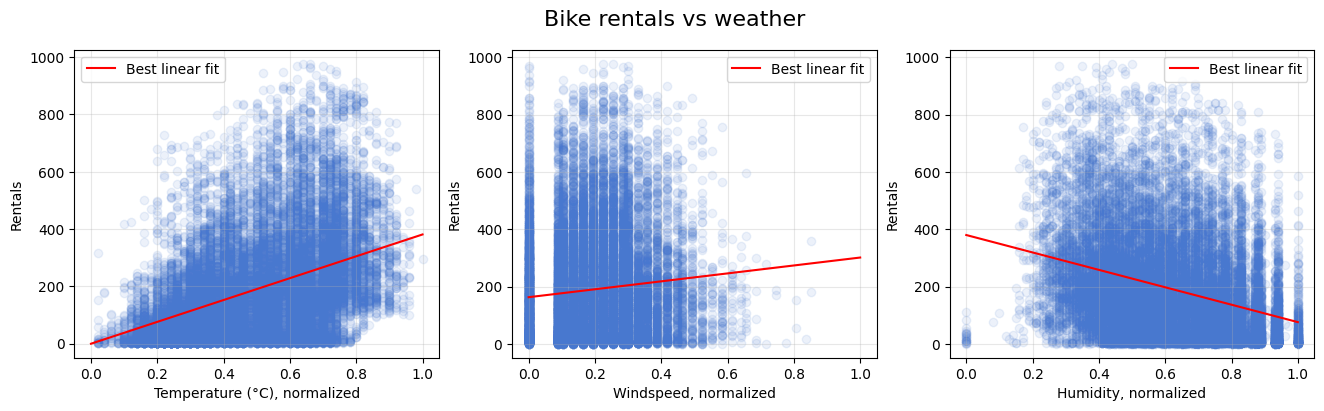

In [9]:
# Plot the fitted lines for the first three specifications
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
xs = np.linspace(0, 1, 100) # 100 points between 0 and 1

# First plot, rentals vs temperature
beta0, beta1 = betas[0]
axs[0].scatter(rentals["temp"], rentals["cnt"], alpha=0.1)
axs[0].set_xlabel("Temperature (°C), normalized")

# Second plot, rentals vs windspeed
beta0, beta1 = betas[1]
axs[1].scatter(rentals["windspeed"], rentals["cnt"], alpha=0.1)
axs[1].set_xlabel("Windspeed, normalized")

# Third plot, rentals vs humidity
beta0, beta1 = betas[2]
axs[2].scatter(rentals["hum"], rentals["cnt"], alpha=0.1)
axs[2].set_xlabel("Humidity, normalized")

# Add best fit lines for the last three specifications
for i in range(3):
    beta0, beta1 = betas[i]
    axs[i].plot(xs, beta0 + beta1 * xs, color="red", label="Best linear fit")

# Common aesthetics for all plots
for ax in axs:
    ax.grid(alpha=0.3)
    ax.set_ylabel("Rentals")
    ax.legend()

# Add a title to the figure
fig.suptitle("Bike rentals vs weather", fontsize=16)

In [10]:
# Compute predictions
yhats = [X @ beta for X, beta in zip(Xs, betas)]

# Compute prediction errors
pred_errors = [y - yhat for yhat in yhats]

# Compute empirical risk
risks = [np.mean(e ** 2) for e in pred_errors]

# Print the empirical risk for each specification
for i, risk in enumerate(risks):
    print(f"Empirical risk for specification {i + 1}: {risk:.2f}")

Empirical risk for specification 1: 27509.28
Empirical risk for specification 2: 32613.59
Empirical risk for specification 3: 29469.09
Empirical risk for specification 4: 27162.81
Empirical risk for specification 5: 24639.46
Empirical risk for specification 6: 24629.99


___
## `scikit-learn`

Now that we have seen how to solve the empirical risk minimization problem for linear models, let us see how we can use `scikit-learn` to solve the same problem. While it is instructive to solve the empirical risk minimization problem by hand, it is often more convenient to use a library like `scikit-learn` to solve the problem for us.

In fact, `scikit-learn` will be our go-to library for the rest of the course. It contains implementations of many different machine learning algorithms, and provides a consistent interface for all of them. This means that once you know how to use `scikit-learn` to solve one machine learning problem, you will be able to use it to solve many others.

On top of machine learning algorithms, `scikit-learn` also contains many useful tools for data preprocessing, model selection, and model evaluation. We will see examples of these tools in future notebooks.

In [11]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

In [12]:
# Set our X matrix to be the temperature, windspeed and humidity
X = rentals[["temp", "windspeed", "hum"]].values
y = rentals["cnt"].values

# Compute the beta coefficients using scikit-learn
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X, y)

# Print the coefficients estimated by scikit-learn
print(f"Intercept: {linreg.intercept_:.2f}")
print(f"Temperature coefficient: {linreg.coef_[0]:.2f}")
print(f"Windspeed coefficient: {linreg.coef_[1]:.2f}")
print(f"Humidity coefficient: {linreg.coef_[2]:.2f}")

Intercept: 175.81
Temperature coefficient: 362.53
Windspeed coefficient: 26.32
Humidity coefficient: -273.47


#### ➡️ ✏️ Task 3

Compare your function `beta_min` from Task 1 with the `LinearRegression` class from `scikit-learn`.

1. Estimate the coefficients $\hat{\boldsymbol{\beta}}$ for `X` and `y` using your function `beta_min`.
2. Compare the coefficients $\hat{\boldsymbol{\beta}}$ obtained using your function `beta_min` with the coefficients obtained above using `LinearRegression`, what do you notice?
3. Repeat the estimation using `LinearRegression` with the `fit_intercept` parameter set to `False`. What do you notice?

In [13]:
# Your code here

In [14]:
# TODO: REMOVE SOLUTION

beta = beta_min(X, y)
print(f"Intercept (sci-kit learn): {linreg.intercept_:.2f}")
print(f"Intercept (hand-coded): None")
print(f"Temperature coefficient (sci-kit learn): {linreg.coef_[0]:.2f}")
print(f"Temperature coefficient (hand-coded): {beta[0]:.2f}")
print(f"Windspeed coefficient (sci-kit learn): {linreg.coef_[1]:.2f}")
print(f"Windspeed coefficient (hand-coded): {beta[1]:.2f}")
print(f"Humidity coefficient (sci-kit learn): {linreg.coef_[2]:.2f}")
print(f"Humidity coefficient (hand-coded): {beta[2]:.2f}")

Intercept (sci-kit learn): 175.81
Intercept (hand-coded): None
Temperature coefficient (sci-kit learn): 362.53
Temperature coefficient (hand-coded): 462.18
Windspeed coefficient (sci-kit learn): 26.32
Windspeed coefficient (hand-coded): 178.86
Humidity coefficient (sci-kit learn): -273.47
Humidity coefficient (hand-coded): -128.74


In [15]:
# TODO: REMOVE SOLUTION

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)
print(f"Temperature coefficient (sci-kit learn): {linreg.coef_[0]:.2f}")
print(f"Temperature coefficient (hand-coded): {beta[0]:.2f}")
print(f"Windspeed coefficient (sci-kit learn): {linreg.coef_[1]:.2f}")
print(f"Windspeed coefficient (hand-coded): {beta[1]:.2f}")
print(f"Humidity coefficient (sci-kit learn): {linreg.coef_[2]:.2f}")
print(f"Humidity coefficient (hand-coded): {beta[2]:.2f}")

Temperature coefficient (sci-kit learn): 462.18
Temperature coefficient (hand-coded): 462.18
Windspeed coefficient (sci-kit learn): 178.86
Windspeed coefficient (hand-coded): 178.86
Humidity coefficient (sci-kit learn): -128.74
Humidity coefficient (hand-coded): -128.74


### Estimators in `scikit-learn`

In `scikit-learn`, all machine learning algorithms are implemented as **estimators**. An estimator is an object that can be used to estimate the parameters of a model. In the case of linear regression, the `LinearRegression` class is an estimator that can be used to estimate the coefficients $\boldsymbol{\beta}$ of a linear model. In general, estimators have two main methods:

1. `fit(X, y)`: estimates the parameters of the model using the training data `X` and `y`.
2. `predict(X)`: uses the estimated parameters to predict the target variable for new data `X`.

In [16]:
# Once our model is fitted, we can use it to make predictions easily
preds = linreg.predict(X)

# We can then compute the empirical risk
risk = np.mean((y - preds) ** 2)
print(f"Empirical risk: {risk:.2f}")

Empirical risk: 25774.63


A further nicety of using `scikit-learn` is that it works nearly seamlessly with `pandas` dataframes. This means that we can use `pandas` to load and manipulate our data, and then use `scikit-learn` to estimate our models, we don't have to worry about converting our data from `pandas` dataframes to `numpy` arrays.

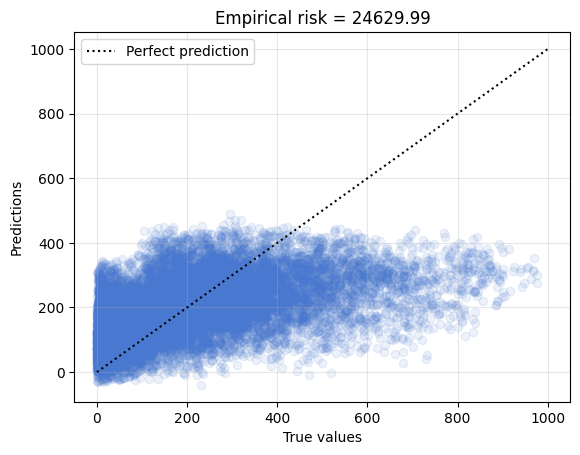

In [17]:
linreg = LinearRegression(fit_intercept=True)
linreg.fit(rentals[["temp", "windspeed", "hum"]], rentals["cnt"])

fig, ax = plt.subplots()

# Plot the true values vs. the predictions
predictions = linreg.predict(rentals[["temp", "windspeed", "hum"]])
ax.scatter(rentals["cnt"], predictions, alpha=0.1)
ax.plot([0, 1000], [0, 1000], color="black", linestyle=":", label="Perfect prediction")

# Add aesthetics
risk = np.mean((rentals["cnt"] - predictions) ** 2)
ax.set_title(f"Empirical risk = {risk:.2f}")
ax.set_xlabel("True values")
ax.set_ylabel("Predictions")
ax.legend()
ax.grid(alpha=0.3)

#### ➡️ ✏️ Task 4

Add 5 columns to the dataframe `df` containing the following features:
1. `temp2`: the temperature squared.
2. `windspeed2`: the windspeed squared.
3. `humidity2`: the humidity squared.
4. `temp_windspeed`: the product of the temperature and the windspeed.
5. `temp_humidity`: the product of the temperature and the humidity.

*Hint:* Recall, you can use mathematical operations on `pandas` columns just like you would on `numpy` arrays and everything works element-wise.

Then, 

1. estimate the coefficients $\hat{\boldsymbol{\beta}}$ for the following model using `LinearRegression`:
$$\begin{align*}
f_{\beta}(\mathbf{x}) &= \beta_0 + \beta_1 \cdot \text{temp} + \beta_2 \cdot \text{windspeed} + \beta_3 \cdot \text{humidity} \\
&\ \ + \beta_4 \cdot \text{temp}^2 + \beta_5 \cdot \text{windspeed}^2 + \beta_6 \cdot \text{humidity}^2 \\
&\ \ + \beta_7 \cdot \text{temp} \cdot \text{windspeed} + \beta_8 \cdot \text{temp} \cdot \text{humidity},
\end{align*}$$

2. compute the predictions and compute the empirical risk $\hat{L}(\hat{\boldsymbol{\beta}})$,
3. compare the empirical risk you obtain with this model compared to the models you obtained above.

What do you conclude? Discuss with your classmates?

In [18]:
# Enter your code here

In [19]:
# TODO: REMOVE SOLUTION

# Add the columns
rentals["temp2"] = rentals["temp"] ** 2
rentals["windspeed2"] = rentals["windspeed"] ** 2
rentals["hum2"] = rentals["hum"] ** 2
rentals["temp_windspeed"] = rentals["temp"] * rentals["windspeed"]
rentals["temp_hum"] = rentals["temp"] * rentals["hum"]

# Set our X matrix
X = rentals.drop(columns=["cnt"])
y = rentals["cnt"]

# Fit the model
linreg = LinearRegression()
linreg.fit(X, y)

risk = np.mean((y - linreg.predict(X)) ** 2)
print(f"Empirical risk: {risk:.2f}")

Empirical risk: 23702.34
